In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy as sp 
from sklearn.decomposition import PCA
from math import pi
from math import sqrt
from math import exp

In [30]:
#-------------------------------------------------------------------------------
#wczytywanie danych
#-------------------------------------------------------------------------------
dataset = pd.read_csv('../../wine.data', sep=",", header = None, engine='python') 
dataset.columns = ['class','alcohol (‰)','malic acid (g/l)', 'ash (g/l)','alcalinity of ash (%)', #mały opis każdej z kolumn
                'magnesium (mg/l)','total phenols (mg/l)','flavanoids (mg/l)','nonflavanoid phenols (mg/l)',
                'Proanthocyanins (mg/l)','color intensity (some numeric scale)','Hue (some numeric scale)',
                'OD280/OD315 of diluted wines (unknown unit)','proline (unknown unit)']

#rozbijamy 
whichClass = dataset['class']
data = dataset.drop('class',axis=1)

In [29]:
#-------------------------------------------------------------------------------
#PCA
#-------------------------------------------------------------------------------
n = len(data.columns) #ilość recordów jakie dajemy na input
pca = PCA(n_components=n)
pca.fit(data)

var = pca.explained_variance_ratio_ #procentowe wariancje w zależności od zmiennej (skala 0-1)
cumulVar = np.cumsum(var) #skumulowane

dataAfterPca = pca.transform(data) #nowe zmienne


178

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


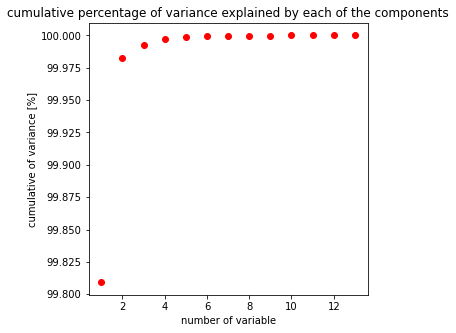

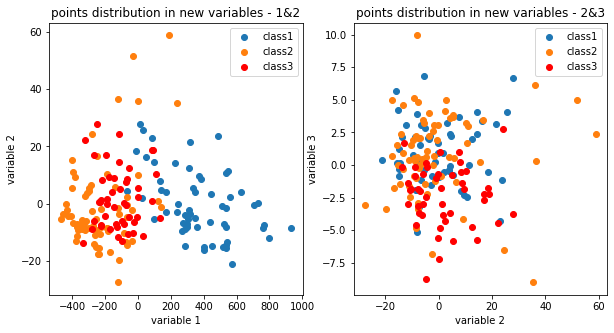

In [34]:
#-------------------------------------------------------------------------------
#Wizualka
#-------------------------------------------------------------------------------
varNumber = np.linspace(1,n,n)
print(varNumber)

#wariancja
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(varNumber, cumulVar*100, label='data', c='#ff0000')
ax.title.set_text("cumulative percentage of variance explained by each of the components")
ax.set_xlabel("number of variable")
ax.set_ylabel("cumulative of variance [%]")
plt.show()


#zmienne
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1) 
ax1.scatter(dataAfterPca[whichClass==1][:, 0], dataAfterPca[whichClass==1][:, 1], label='class1', c='#1f77b4') #trick z malowaniem klasy od Wasiluka
ax1.scatter(dataAfterPca[whichClass==2][:, 0], dataAfterPca[whichClass==2][:, 1], label='class2', c='#ff7f0e') 
ax1.scatter(dataAfterPca[whichClass==3][:, 0], dataAfterPca[whichClass==3][:, 1], label='class3', c='#ff0000')
ax1.title.set_text("points distribution in new variables - 1&2")
ax1.set_xlabel("variable 1")
ax1.set_ylabel("variable 2")
ax1.legend()

ax2 = fig.add_subplot(1,2,2) 
ax2.scatter(dataAfterPca[whichClass==1][:, 1], dataAfterPca[whichClass==1][:, 2], label='class1', c='#1f77b4') #trick z malowaniem klasy od Wasiluka
ax2.scatter(dataAfterPca[whichClass==2][:, 1], dataAfterPca[whichClass==2][:, 2], label='class2', c='#ff7f0e') 
ax2.scatter(dataAfterPca[whichClass==3][:, 1], dataAfterPca[whichClass==3][:, 2], label='class3', c='#ff0000')
ax2.title.set_text("points distribution in new variables - 2&3")
ax2.set_xlabel("variable 2")
ax2.set_ylabel("variable 3")
ax2.legend()


plt.show()